# Exploring the Moon in HERA's beam
#### By Jean Donet

HERA is not equally sensitive across its f

In [2]:
import matplotlib.pyplot as plt
import healpy as hp
from pyuvdata import UVBeam
from pyuvdata import UVData
from MoonLSTs import zenithdec, zenithra  #Importing the RA and Dec for HERA zenith
from Moontracking import ra_opt, dec_opt, jds_opt
from pylab import meshgrid, cm
from Link_Budget import jy
import numpy as np
import math as math
from mpl_toolkits.mplot3d import Axes3D
from astropy.coordinates import SkyCoord
%matplotlib notebook

In [39]:
hera_beam = UVBeam() #Instantiating HERA's beam as a UVBeam object
hera_beam.read_beamfits("/data4/jdonet/CHAMP_ASU_Jean/NF_HERA_power_beam_healpix.fits") #Reading in the beam model
nside = hera_beam.nside #Setting the nside variable to be used in plotting

<IPython.core.display.Javascript object>


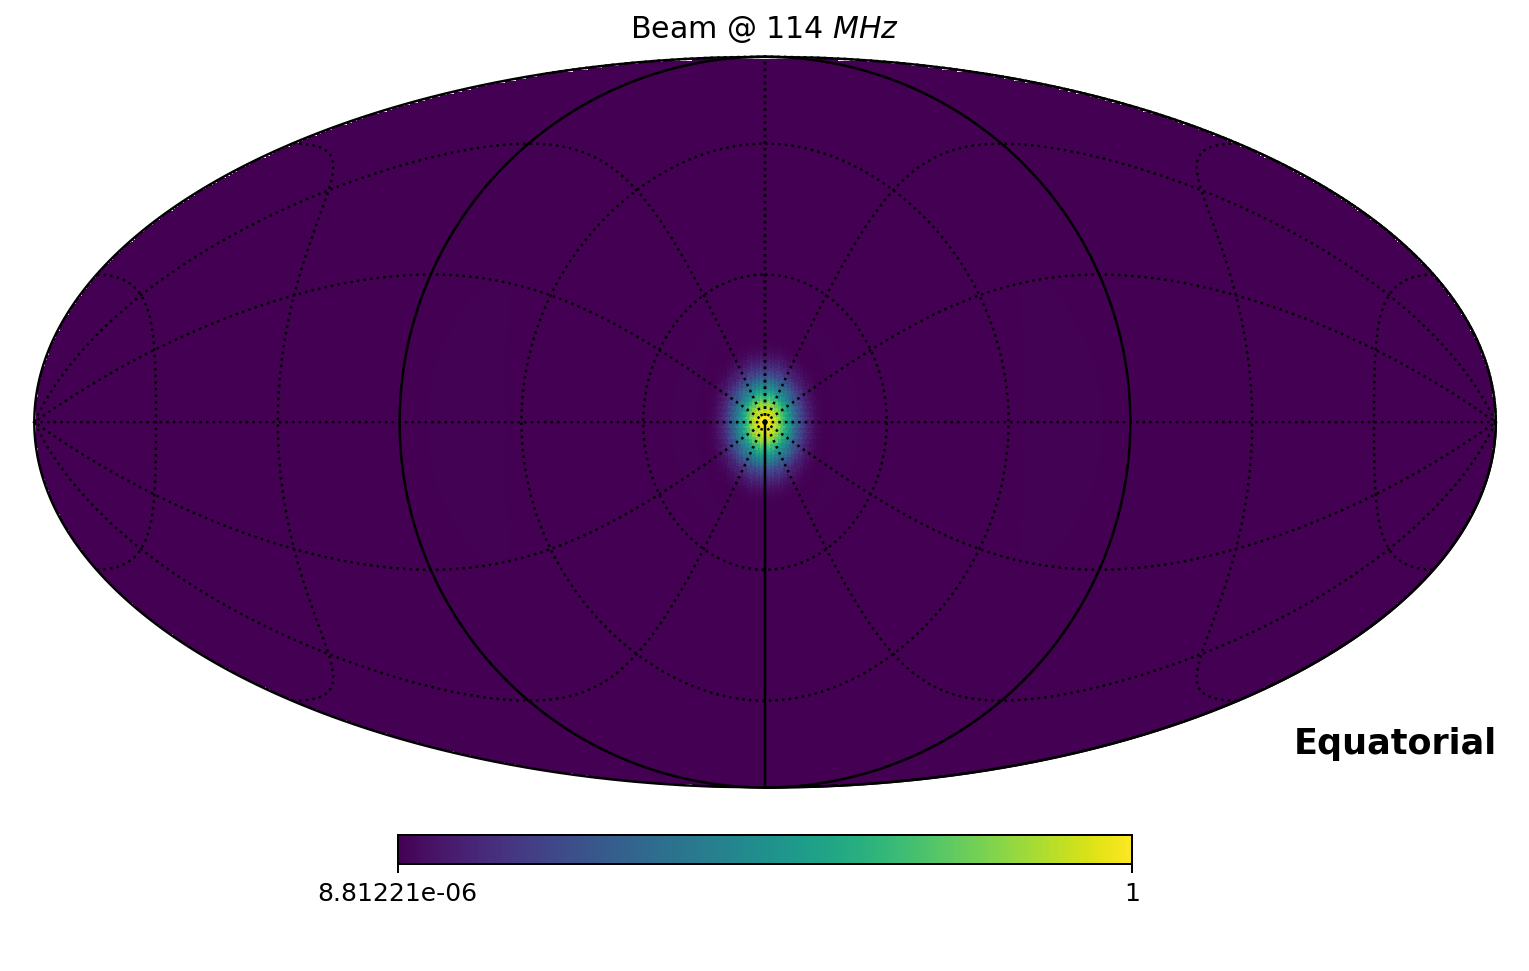

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


In [40]:
beam_map = hera_beam.data_array[0][0][0][14] #Selecting a specific frequency to observe
beam_map_norm = beam_map/np.max(beam_map)
mapping = hp.mollview(beam_map_norm
                      ,title="Beam @ 114 $MHz$"
                      ,nest=None
                      ,coord="C"
                      ,return_projected_map=True
                      ,rot=[0.0,90.0]) #Best look at beam
                                                
hp.graticule()

<IPython.core.display.Javascript object>


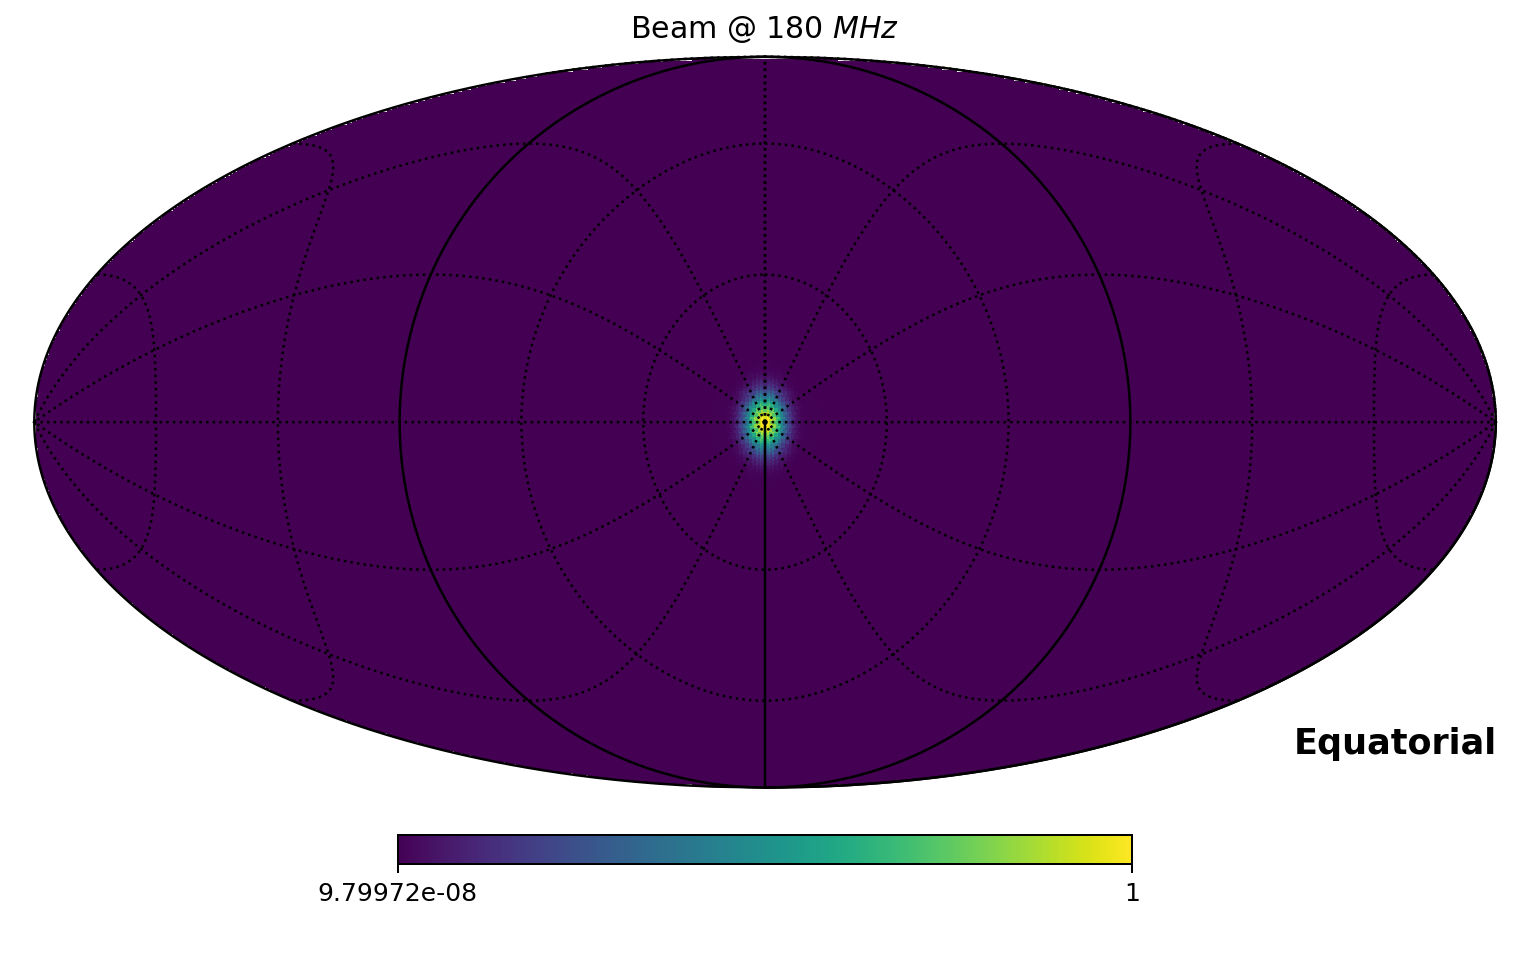

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


In [6]:
beam_map = hera_beam.data_array[0][0][0][80] #Selecting a specific frequency to observe
beam_map_norm = beam_map/np.max(beam_map)
mapping = hp.mollview(beam_map_norm
                      ,title="Beam @ 180 $MHz$"
                      ,nest=None
                      ,coord="C"
                      ,return_projected_map=True
                      ,rot=[0.0,90.0]) #Best look at beam
                                                
hp.graticule()

In [7]:
#Getting familiar with beam_map
#print beam_map
print len(beam_map), np.max(beam_map), np.min(beam_map), beam_map.shape, type(beam_map)

49152 12516.439491241637 0.001226575516619302 (49152,) <type 'numpy.ndarray'>


In [8]:
print hera_beam.data_array.shape

(1, 1, 2, 101, 49152)


In [9]:
hera_beam._data_array.description

'Depending on beam type, either complex E-field values ("efield" beam type) or power values ("power" beam type) for beam model. units are linear normalized to either peak or solid angle as given by data_normalization. The shape depends on the beam_type and pixel_coordinate_system, if it is "healpix", the shape is: (Naxes_vec, Nspws, Nfeeds or Npols, Nfreqs, Npixels), otherwise it is (Naxes_vec, Nspws, Nfeeds or Npols, Nfreqs, Naxes2, Naxes1)'

<IPython.core.display.Javascript object>


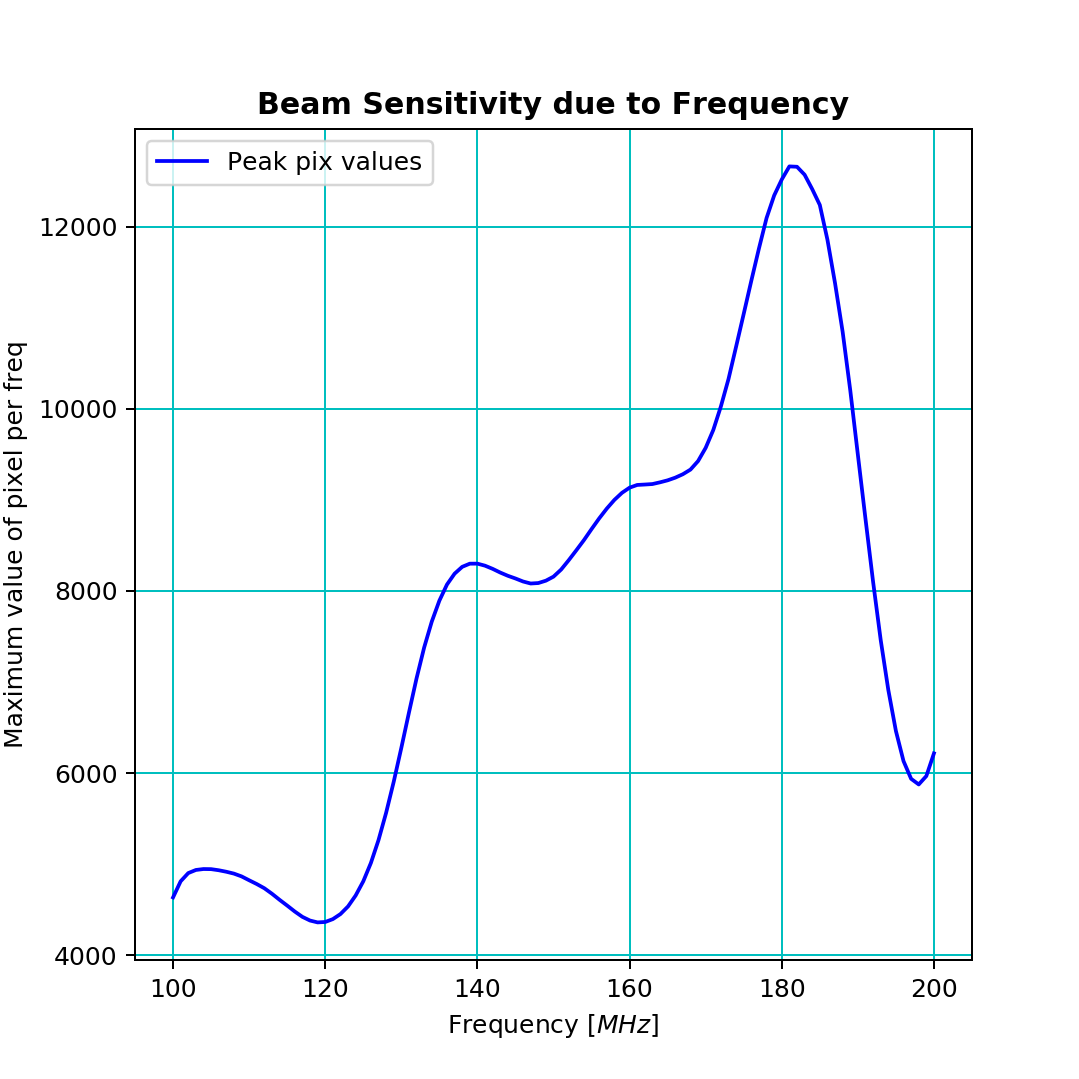

In [10]:
plt_values = []
fig1 = plt.figure(figsize=(6.0,6.0))

#Plotting Frequency vs Maximum pixel value for each freq.
for i in range(101):
    plt_value = np.max(hera_beam.data_array[0][0][0][i])
    plt_values.append(plt_value)
                     
plt.plot(range(100,201),plt_values, "b-", label="Peak pix values")
plt.xlabel("Frequency [$MHz$]")
plt.ylabel("Maximum value of pixel per freq")
plt.title("Beam Sensitivity due to Frequency", fontweight="bold")
plt.grid(True, color="c")
plt.legend()

In [11]:
zenithra                             #Checking for RA value correctness
zenithra_deg = np.rad2deg(zenithra)  #Converting from radians to degrees
print zenithra_deg

313.3679874878402


In [12]:
zenithdec                              #Checking for Dec value correctness
zenithdec_deg = np.rad2deg(zenithdec)  #Converting from radians to degrees
print zenithdec_deg

-30.72152612068925


In [13]:
def beam_factor_2D(ra, dec, hera_zen_ra, freq):
    """
    Outputs the beam factor of an objects's specified RA and Dec.
    Args:
    'ra'          : Object's Right Ascension in degrees
    'dec'         : Object's Declination in degrees
    'hera_zen_ra' : HERA's Zenith Right Ascension for the specific JDate in degrees
    'freq'        : The frequency we want to analyze (interger)
    """
    hera_ra    = ra                                    #RA as seen by HERA
    hera_dec   = dec                                   #Dec as seen by HERA
    rel_dec    = hera_dec + 30.72152612068925          #Finding relative Dec at HERA
    rel_ra     = hera_ra - hera_zen_ra                 #Finding relative RA at HERA
    np_dec     = np.sqrt(rel_dec**2 + rel_ra**2)       #Transforming rect RA to polar
    np_ra      = math.atan2(rel_dec,rel_ra)            #Transforming rect Dec to polar
    np_ra      = np.rad2deg(np_ra)                     #Turning radians to degrees
    np_dec     = rel_dec + 90.0                        #Finding corresponding North Pole Dec
    np_ra      = np_ra                                 #Finding corresponding North Pole RA
#     print np_ra, np_dec
    freq           = freq - 100                           #Changing the freq to array element
    beam_map       = hera_beam.data_array[0][0][0][freq]  #Selecting specified frequency
#     print np.max(beam_map)
    beam_map_norm  = beam_map/np.max(beam_map)            #Normalizing values of beam model
    
#     Finding pixel value @ specified coords.
    return hp.get_interp_val(beam_map_norm,np_ra,np_dec, lonlat=True)

In [14]:
beam_map = hera_beam.data_array[0][0][0][0]
beam_factor_2D(zenithra_deg,zenithdec_deg,zenithra_deg,180)
print beam_factor_2D(zenithra_deg,zenithdec_deg,zenithra_deg,120)
# figure = plt.figure(figsize=(6.0,6.0))
decs = np.linspace(0.0,180.0,400)

# for i in decs:
#     plt.plot(i,hp.get_interp_val(beam_map,0.0,i, lonlat=True), "ro", markersize=4.0)

0.9999685242665265


In [15]:
# np.set_printoptions(precision=7)
len(hera_beam.freq_array[0])

101

<IPython.core.display.Javascript object>


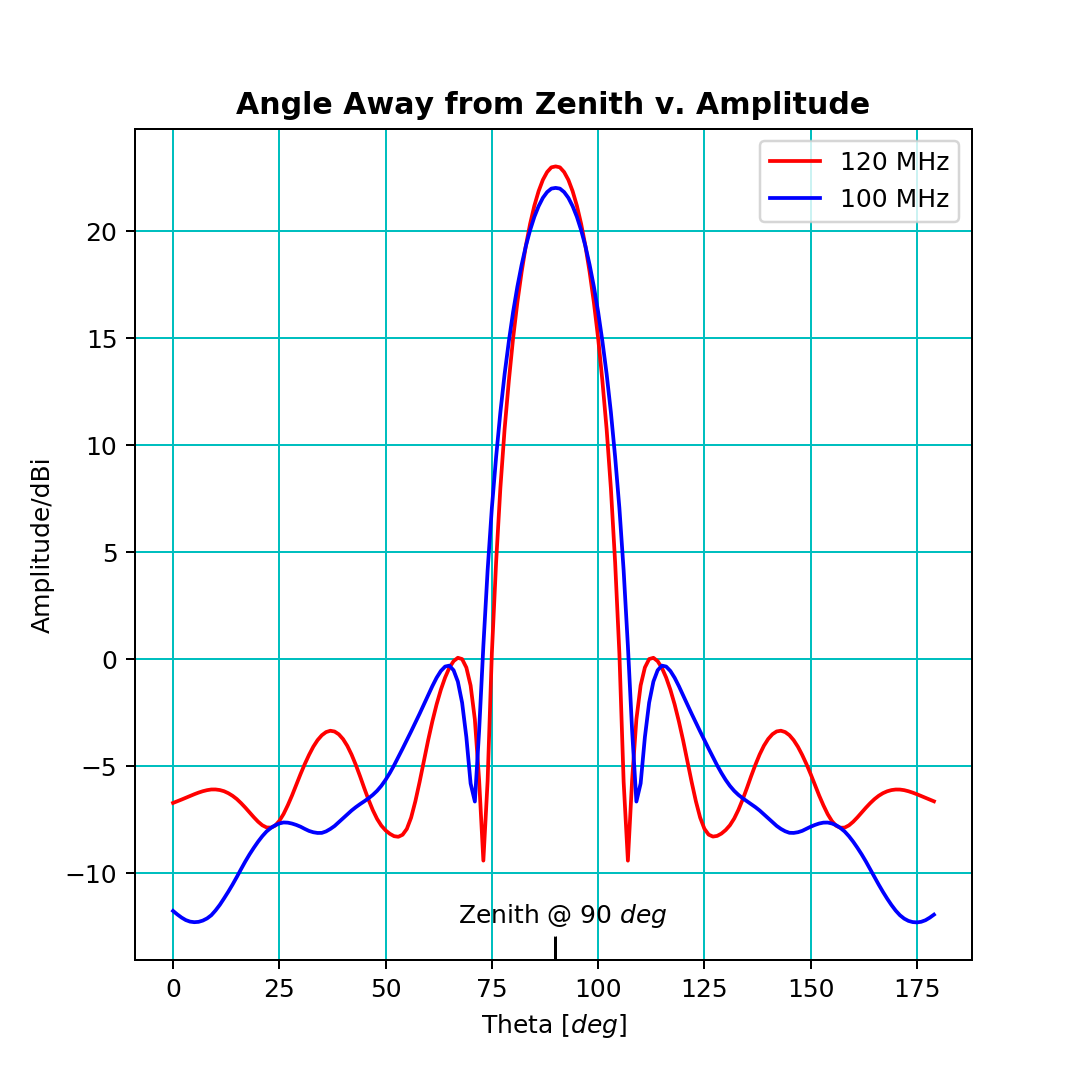

Text(67,-12.3,'Zenith @ 90 $deg$')

In [16]:
fig2 = plt.figure(figsize=(6.0,6.0))
array_100  = []
array_120  = []
beam_120   = hera_beam.data_array[0][0][0][20]
beam_100   = hera_beam.data_array[0][0][0][0]
sum_100    = np.sum(beam_100)
sum_120    = np.sum(beam_120)

pix_size   = hp.nside2pixarea(nside=nside)

for dec in range(0,180):
#     moon_factor = beam_factor_2D(zenithra_deg,zenithdec_deg,zenithra_deg,freq)
    factor_120 = hp.get_interp_val(beam_120, 0.0, float(dec), lonlat=True)
    moon_factor = (4.0*np.pi*factor_120)/(sum_120*pix_size)
    moon_factor = np.log10(moon_factor)*10.0
    array_120.append(moon_factor)
#     moon_factor -= 15.0


for dec in range(0,180):
#     moon_factor = beam_factor_2D(316.15973309,-15.84410523,zenithra_deg,freq)
#     moon_factor = beam_factor_2D(zenithra_deg,zenithdec_deg,zenithra_deg,freq)
    factor_100 = hp.get_interp_val(beam_100, 0.0, float(dec), lonlat=True)
    moon_factor = (4.0*np.pi*factor_100)/(sum_100*pix_size)
    moon_factor = np.log10(moon_factor)*10.0
    array_100.append(moon_factor)
#     moon_factor -= 15.0

plt.plot(range(0,180), array_120, "r-", label="120 MHz")
plt.plot(range(0,180), array_100, "b-", label="100 MHz")

plt.xlabel("Theta [$deg$]")
plt.ylabel("Amplitude/dBi")
plt.title("Angle Away from Zenith v. Amplitude", fontweight="bold")
plt.grid(True, color="c")
plt.legend()
plt.arrow(90,-15,0,2)
plt.text(67,-12.3,"Zenith @ 90 $deg$")

<IPython.core.display.Javascript object>


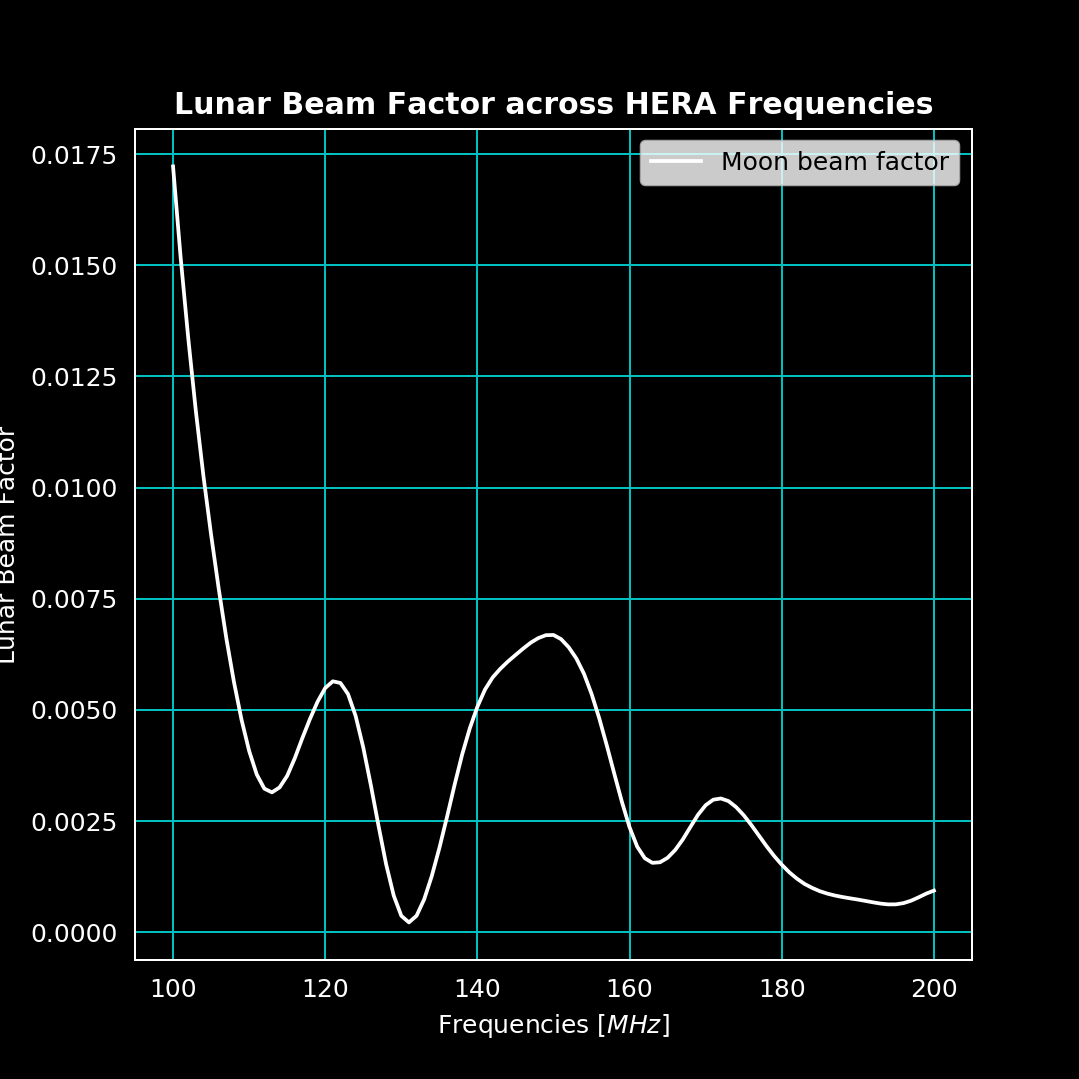

In [97]:
moon_facts = []
figure2 = plt.figure(figsize=(6.0,6.0), facecolor="black", edgecolor="white")
axes = plt.subplot(111)
axes.patch.set_facecolor("black")
plt.grid(False, color="white")
plt.yticks(color="white")
plt.xticks(color="white")

for spine in axes.spines.values():
    spine.set_color("white")

for freq in range(100,201):
    moon_factor = beam_factor_2D(316.15973309,-15.84410523,zenithra_deg,freq)
    moon_facts.append(moon_factor)

plt.plot(range(100,201), moon_facts, "w-", label="Moon beam factor")
plt.xlabel("Frequencies [$MHz$]", color="white")
plt.ylabel("Lunar Beam Factor", color="white")
plt.title("Lunar Beam Factor across HERA Frequencies", fontweight="bold", color="white")
plt.grid(True, color="c")
plt.legend()

In [42]:
index        = 0
moon_freqs   = []
src1_factors = []
src2_factors = []
moon_factors = []

source1_ra, source1_dec = 316.833862, -25.436880
source2_ra, source2_dec = 315.418915, -28.055460

for frequency in hera_beam.freq_array[0]:
    if frequency >= 1.39e8 and frequency <= 1.5e8:
        index += 1
        freq_element = frequency/1e6
        freq_element = int(freq_element)
        moon_freqs.append(freq_element)

for lunar_freq in moon_freqs:
#     print lunar_freq
    moon_factor = beam_factor_2D(316.15973309,-15.84410523,zenithra_deg,lunar_freq)
    src1_factor = beam_factor_2D(source1_ra,source1_dec,zenithra_deg,lunar_freq)
    src2_factor = beam_factor_2D(source2_ra,source2_dec,zenithra_deg,lunar_freq)
    moon_factors.append(moon_factor)
    src1_factors.append(src1_factor)
    src2_factors.append(src2_factor)

# print moon_factors
# print src1_factors
# print src2_factors

print index
freq_avg = np.sum(moon_freqs)/index
moon_avg = np.sum(moon_factors)/index
src1_avg = np.sum(src1_factors)/index 
src2_avg = np.sum(src2_factors)/index

print freq_avg
print moon_avg
print src1_avg
print src2_avg

12
144
0.005996844380597732
0.4649805361188204
0.8363603168359512


In [19]:
print np.min(moon_factors), np.max(moon_factors)

0.005073037536416134 0.006685409456004941


<IPython.core.display.Javascript object>


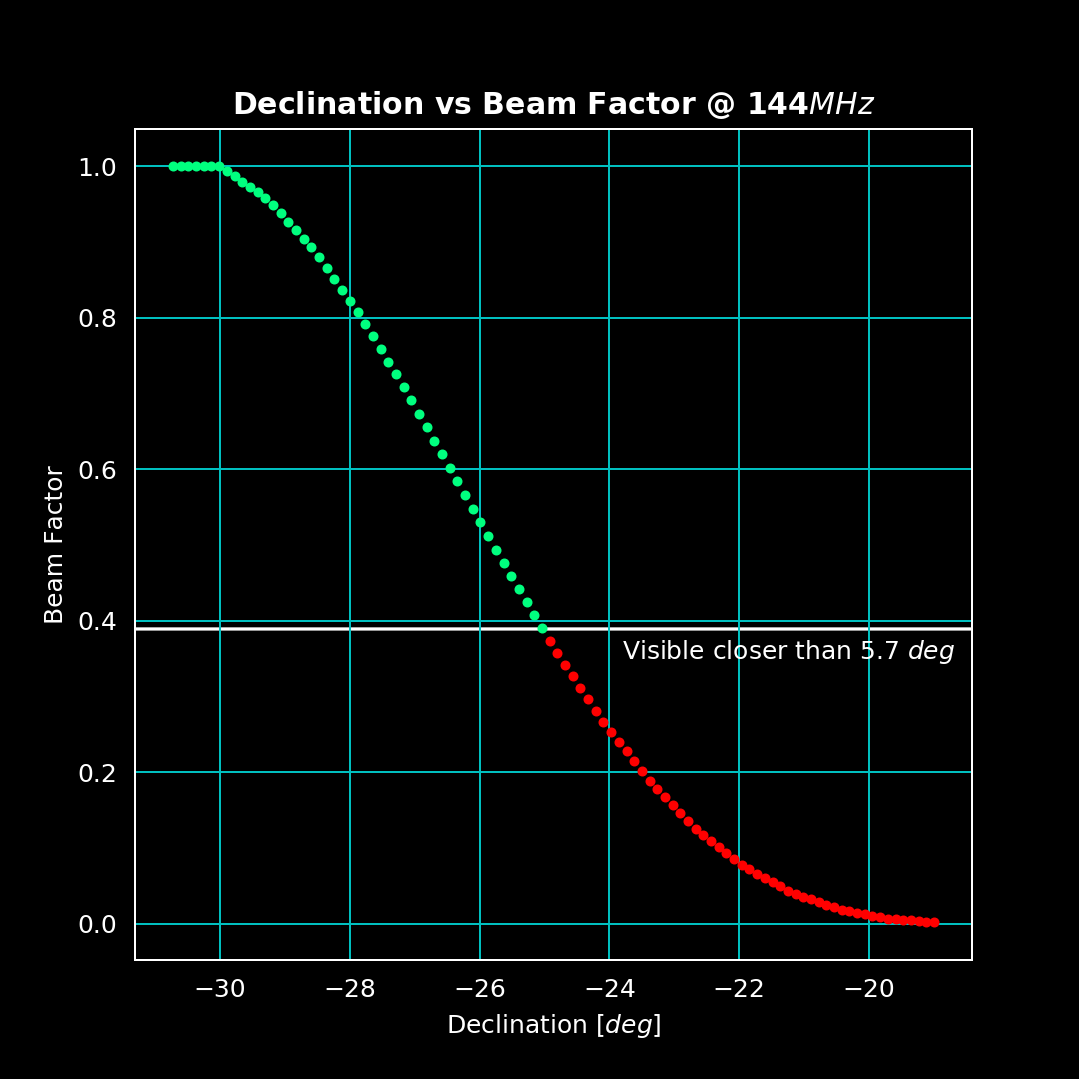

Text(-23.8,0.35,'Visible closer than 5.7 $deg$')

In [58]:
dec_range = np.linspace(-19.0,zenithdec_deg,100)
fig3 = plt.figure(figsize=(6.0,6.0), facecolor="black", edgecolor="white")
axes = plt.subplot(111)
axes.patch.set_facecolor("black")
plt.grid(False, color="white")
plt.yticks(color="white")
plt.xticks(color="white")

for spine in axes.spines.values():
    spine.set_color("white")

for dec in dec_range:
    beam_factor = beam_factor_2D(zenithra_deg,dec,zenithra_deg,144)
#     beam_factor = np.log10(beam_factor)*10.0
    if beam_factor >= 0.389:
        plt.plot(dec,beam_factor, "o", c="#00ff7f", markersize=3.0)
    else:
        plt.plot(dec,beam_factor, "ro", markersize=3.0)

plt.xlabel("Declination [$deg$]",color="white")
plt.ylabel("Beam Factor",color="white")
plt.title("Declination vs Beam Factor @ 144$MHz$", fontweight="bold",color="white")
plt.grid(True, color="c")
plt.arrow(-31.5344,0.389,18.3541,0,color = "white") #21.6767
plt.text(-23.8,0.35,"Visible closer than 5.7 $deg$", color = "white")
# plt.savefig("DEC_Bfactor_114.jpg")

In [21]:
def ra_hms2deg(ra):
    c = SkyCoord(ra + "+0d00m00s")
    ra_deg = c.ra.deg
    return ra_deg

def lst2string(lst):
    lst = list(lst)
    lst[2], lst[5] = "h", "m"
    lst.append("s")
    lst = ''.join(lst)
    return lst

In [22]:
path_lst = "/data4/jdonet/data/fut_lst.csv"
array = np.genfromtxt(path_lst, dtype="str", delimiter=",", usecols=4, unpack=True)

In [23]:
future_ras = []
for lst in array:
    lst_hms = lst2string(lst)
    ra_hms  = ra_hms2deg(lst_hms)
    future_ras.append(ra_hms)
    
print future_ras

[260.61276625, 260.65454666666665, 260.69632749999994, 260.73810833333334, 260.77988916666663, 260.82167, 260.86345041666664, 260.90523124999993, 260.94701208333333, 260.9887929166666, 261.0305733333333, 261.0723541666666, 261.1141349999999, 261.1559158333333, 261.1976966666666, 261.23947708333327, 261.2812579166666, 261.32303874999997, 261.3648195833333, 261.40660041666666, 261.44838125, 261.4901616666666, 261.53194249999996, 261.5737233333333, 261.61550416666665, 261.657285, 261.6990654166666, 261.74084625, 261.7826270833333, 261.82440791666664, 261.8661883333333, 261.9079691666666, 261.94975, 261.9915308333333, 262.03331166666663, 262.0750920833333, 262.1168729166666, 262.15865375, 262.2004345833333, 262.2422154166666, 262.2839958333333, 262.3257766666666, 262.36755750000003, 262.4093383333333, 262.45111875, 262.4928995833333, 262.5346804166666, 262.57646125, 262.6182420833333, 262.66002249999997, 262.7018033333333, 262.74358416666666, 262.78536499999996, 262.8271458333333, 262.8689

In [27]:
future_avgras = []
index1 = 0
index2 = 60
for i in range(len(future_ras)/60):
    ras = future_ras[index1:index2]
    ra = ras[(len(ras)/2)-1]
    future_avgras.append(ra)
    index1 += 60
    index2 += 60

relvnt_ftr_agvras = future_avgras[:33]
print len(future_avgras)
print future_avgras
print len(relvnt_ftr_agvras)
print relvnt_ftr_agvras

73
[261.82440791666664, 264.3312525, 266.8380975, 269.34494249999995, 271.8517870833333, 274.3586320833333, 276.8654766666666, 279.37232166666666, 281.87916666666666, 284.38601124999997, 286.89285624999997, 289.39970124999996, 291.90654583333327, 294.4133908333333, 296.9202358333333, 299.4270804166666, 301.9339254166666, 304.44077, 306.9476149999999, 309.45446, 311.96130458333334, 314.4681495833333, 316.9749945833333, 319.48183916666665, 321.9886841666666, 324.49552874999995, 327.00237374999995, 329.50921874999995, 332.0160633333333, 334.5229083333333, 337.02975333333325, 339.5365979166666, 342.04344291666666, 344.5502874999999, 347.05713249999997, 349.56397749999996, 352.07082208333327, 354.57766708333327, 357.0845120833333, 359.5913566666666, 2.0982016666666667, 4.605046249999999, 7.111891249999999, 9.618736249999998, 12.125580833333332, 14.632425833333333, 17.13927083333333, 19.646115416666667, 22.152960416666666, 24.659805416666664, 27.166649999999997, 29.673495, 32.18033958333333,

In [25]:
colors = ['AliceBlue', 'AntiqueWhite', 'Aqua', 'Aquamarine', 'Azure', 'Beige', 'Bisque', 'Black', 'BlanchedAlmond', 'Blue', 'BlueViolet', 'Brown', 'BurlyWood', 'CadetBlue', 'Chartreuse', 'Chocolate', 'Coral', 'CornflowerBlue', 'Cornsilk', 'Crimson', 'Cyan', 'DarkBlue', 'DarkCyan', 'DarkGoldenRod', 'DarkGray', 'DarkGrey', 'DarkGreen', 'DarkKhaki', 'DarkMagenta', 'DarkOliveGreen', 'Darkorange', 'DarkOrchid', 'DarkRed', 'DarkSalmon', 'DarkSeaGreen', 'DarkSlateBlue', 'DarkSlateGray', 'DarkSlateGrey', 'DarkTurquoise', 'DarkViolet', 'DeepPink', 'DeepSkyBlue', 'DimGray', 'DimGrey', 'DodgerBlue', 'FireBrick', 'FloralWhite', 'ForestGreen', 'Fuchsia', 'Gainsboro', 'GhostWhite', 'Gold', 'GoldenRod', 'Gray', 'Grey', 'Green', 'GreenYellow', 'HoneyDew', 'HotPink', 'IndianRed', 'Indigo', 'Ivory', 'Khaki', 'Lavender', 'LavenderBlush', 'LawnGreen', 'LemonChiffon', 'LightBlue', 'LightCoral', 'LightCyan', 'LightGoldenRodYellow', 'LightGray', 'LightGrey', 'LightGreen', 'LightPink', 'LightSalmon', 'LightSeaGreen', 'LightSkyBlue', 'LightSlateGray', 'LightSlateGrey', 'LightSteelBlue', 'LightYellow', 'Lime', 'LimeGreen', 'Linen', 'Magenta', 'Maroon', 'MediumAquaMarine', 'MediumBlue', 'MediumOrchid', 'MediumPurple', 'MediumSeaGreen', 'MediumSlateBlue', 'MediumSpringGreen', 'MediumTurquoise', 'MediumVioletRed', 'MidnightBlue', 'MintCream', 'MistyRose', 'Moccasin', 'NavajoWhite', 'Navy', 'OldLace', 'Olive', 'OliveDrab', 'Orange', 'OrangeRed', 'Orchid', 'PaleGoldenRod', 'PaleGreen', 'PaleTurquoise', 'PaleVioletRed', 'PapayaWhip', 'PeachPuff', 'Peru', 'Pink', 'Plum', 'PowderBlue', 'Purple', 'Red', 'RosyBrown', 'RoyalBlue', 'SaddleBrown', 'Salmon', 'SandyBrown', 'SeaGreen', 'SeaShell', 'Sienna', 'Silver', 'SkyBlue', 'SlateBlue', 'SlateGray', 'SlateGrey', 'Snow', 'SpringGreen', 'SteelBlue', 'Tan', 'Teal', 'Thistle', 'Tomato', 'Turquoise', 'Violet', 'Wheat', 'White', 'WhiteSmoke', 'Yellow', 'YellowGreen']

<IPython.core.display.Javascript object>


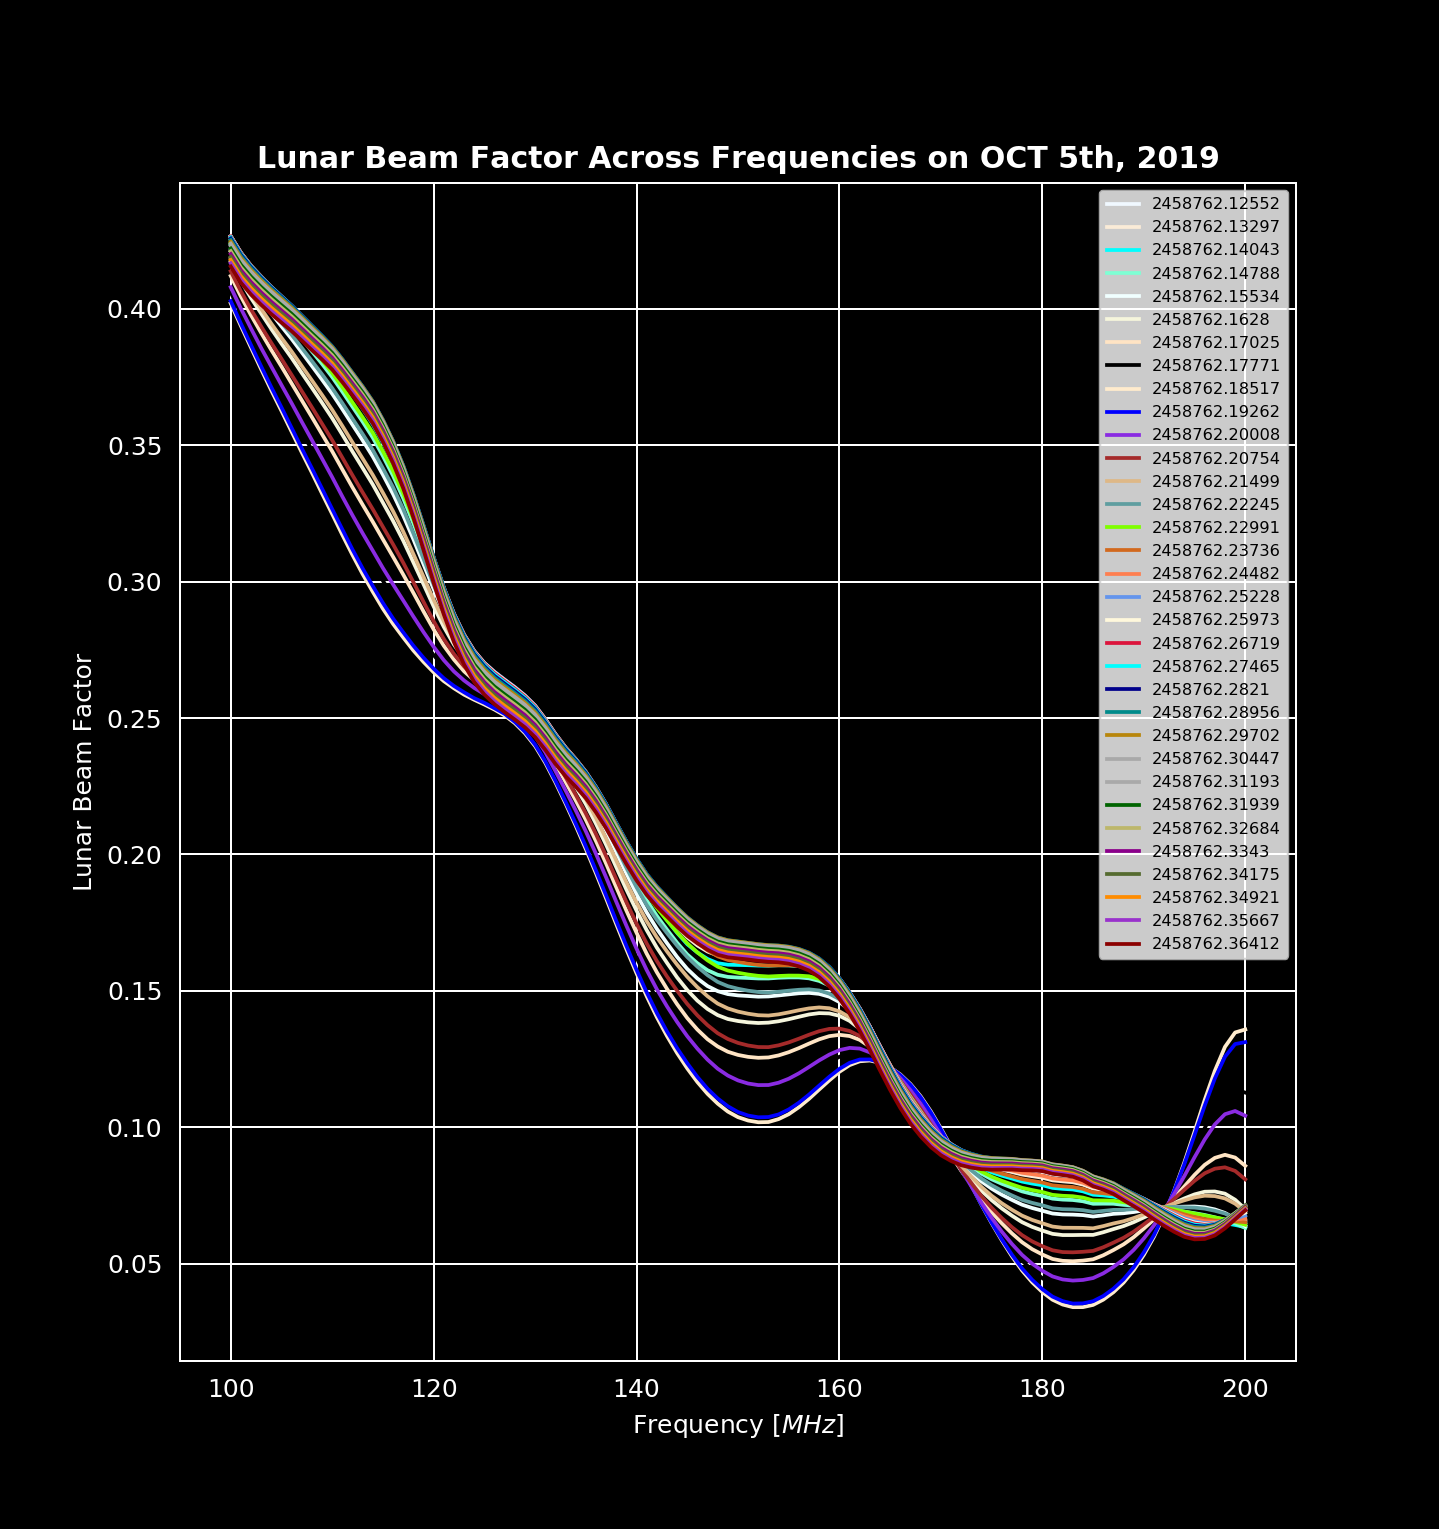

Text(0.5,1,'Lunar Beam Factor Across Frequencies on OCT 5th, 2019')

In [37]:
figure5 = plt.figure(figsize=(8.0,8.5), facecolor="black", edgecolor="white")
axes = plt.subplot(111)
axes.patch.set_facecolor("black")
plt.grid(True, color="white")
plt.yticks(color="white")
plt.xticks(color="white")
for spine in axes.spines.values():
    spine.set_color("white")

for x in range(len(ra_opt)):
    vals = [] 
    for y in range(100,201):
        fctr = beam_factor_2D(ra_opt[x],dec_opt[x],relvnt_ftr_agvras[x],y)
        vals.append(fctr)
    plt.plot(range(100,201),vals,"-",c=colors[x],label=jds_opt[x])

plt.legend(loc="upper right", fontsize=6.5)

plt.xlabel("Frequency [$MHz$]", color="white")
plt.ylabel("Lunar Beam Factor", color="white")
plt.title("Lunar Beam Factor Across Frequencies on OCT 5th, 2019", fontweight="bold", color="white")

In [50]:
zenithdec_deg

-30.72152612068925

<IPython.core.display.Javascript object>


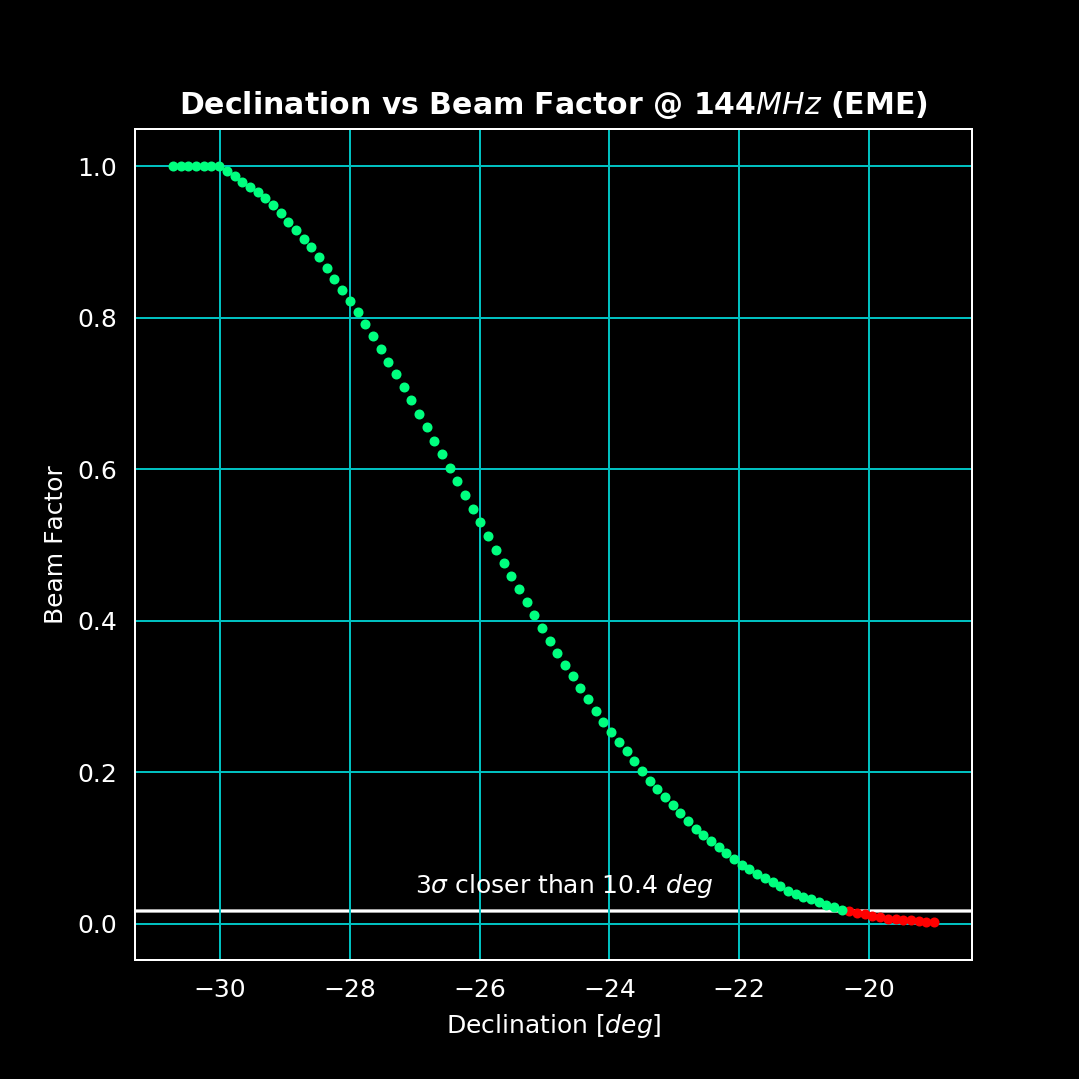

Text(-27,0.04,'3$\\sigma$ closer than 10.4 $deg$')

In [72]:
dec_range = np.linspace(-19.0,zenithdec_deg,100)
fig5 = plt.figure(figsize=(6.0,6.0), facecolor="black", edgecolor="white")
axes = plt.subplot(111)
axes.patch.set_facecolor("black")
plt.grid(False, color="white")
plt.yticks(color="white")
plt.xticks(color="white")

for spine in axes.spines.values():
    spine.set_color("white")

for dec in dec_range:
    beam_factor = beam_factor_2D(zenithra_deg,dec,zenithra_deg,144)
#     beam_factor = np.log10(beam_factor)*10.0
    if beam_factor >= 0.016701:
        plt.plot(dec,beam_factor, "o", c="#00ff7f", markersize=3.0)
    else:
        plt.plot(dec,beam_factor, "ro", markersize=3.0)

plt.xlabel("Declination [$deg$]",color="white")
plt.ylabel("Beam Factor",color="white")
plt.title("Declination vs Beam Factor @ 144$MHz$ (EME)", fontweight="bold",color="white")
plt.grid(True, color="c")
plt.arrow(-31.5344,0.016701,18.3541,0,color = "white") #21.6767
plt.text(-27.0,0.04,"3$\sigma$ closer than 10.4 $deg$", color = "white")
# plt.savefig("DEC_Bfactor_114.jpg")

In [61]:
0.005567*3

0.016701

In [63]:
zenithdec_deg+20.35

-10.37152612068925

<IPython.core.display.Javascript object>


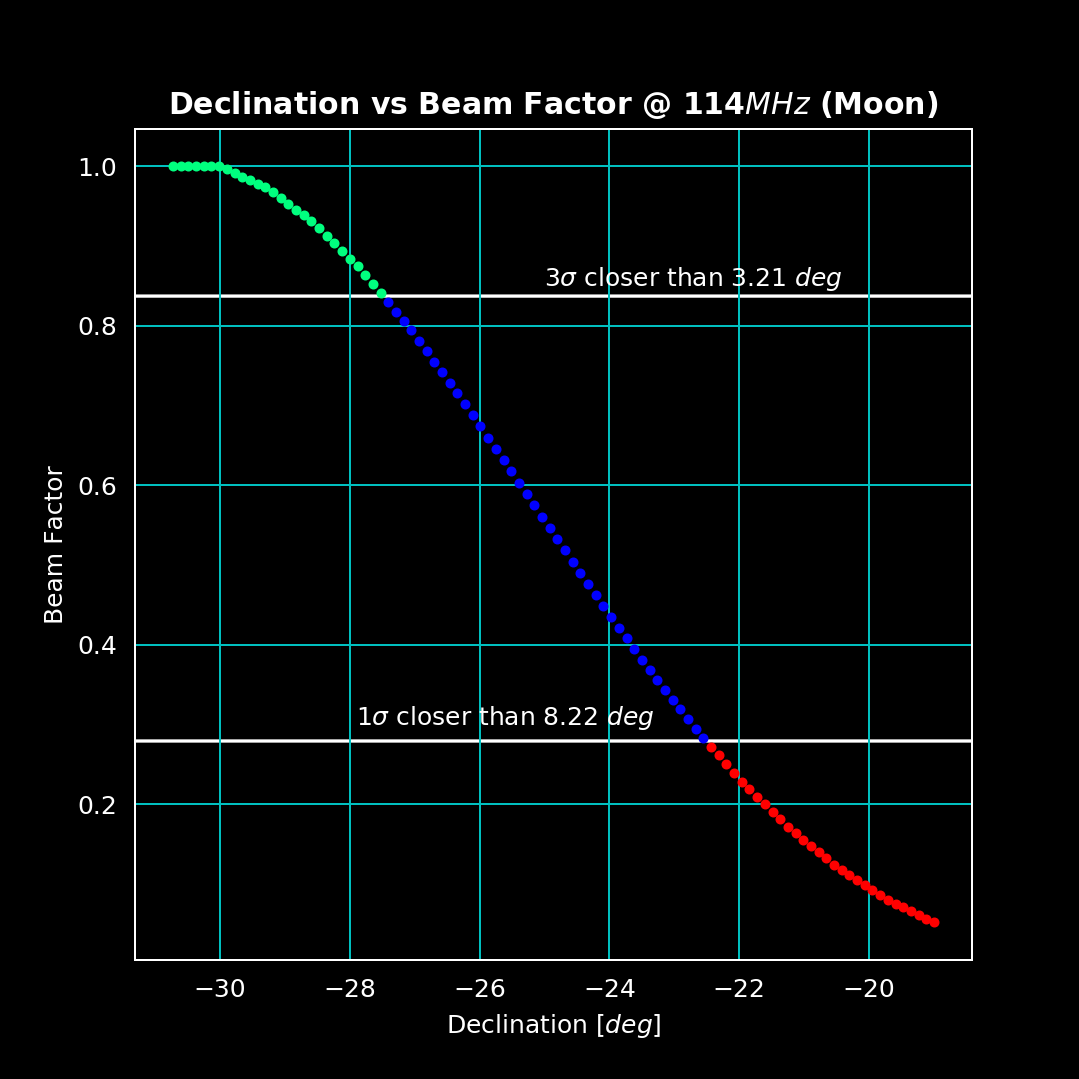

Text(-25,0.85,'3$\\sigma$ closer than 3.21 $deg$')

In [95]:
dec_range = np.linspace(-19.0,zenithdec_deg,100)
fig6 = plt.figure(figsize=(6.0,6.0), facecolor="black", edgecolor="white")
axes = plt.subplot(111)
axes.patch.set_facecolor("black")
plt.grid(False, color="white")
plt.yticks(color="white")
plt.xticks(color="white")

for spine in axes.spines.values():
    spine.set_color("white")

for dec in dec_range:
    beam_factor = beam_factor_2D(zenithra_deg,dec,zenithra_deg,114)
#     beam_factor = np.log10(beam_factor)*10.0
    if beam_factor >= 0.2791*3:
        plt.plot(dec,beam_factor, "o", c="#00ff7f", markersize=3.0)
    elif beam_factor >= 0.2791:
        plt.plot(dec,beam_factor, "bo", markersize=3.0)
    elif beam_factor < 0.2791:
        plt.plot(dec,beam_factor, "ro", markersize=3.0)

plt.xlabel("Declination [$deg$]",color="white")
plt.ylabel("Beam Factor",color="white")
plt.title("Declination vs Beam Factor @ 114$MHz$ (Moon)", fontweight="bold",color="white")
plt.grid(True, color="c")
plt.arrow(-31.5344,0.2791,18.3541,0,color = "white") #21.6767
plt.arrow(-31.5344,0.2791*3,18.3541,0,color = "white")
plt.text(-27.9,0.299,"1$\sigma$ closer than 8.22 $deg$", color = "white")
plt.text(-25.0,0.85,"3$\sigma$ closer than 3.21 $deg$", color = "white")
# plt.savefig("DEC_Bfactor_114.jpg")